# Plotting with matplotlib

`matplotlib` is the most widely used plotting library in Python, and we are going to learn to create plots using that library. It has wide support, and enough features to allow one create any kind of chart imaginable with endless customization.

I also want to highlight the benefits of the programmatic way of creating charts vs using using a software like Excel to create one. The main benefit is repeatability of code - once you have written the code for a custom chart which has been designed to perfection, you can just reuse that code again and again.

## Usage styles in matplotpib

There are two fundamental styles of using matplotlib
- A **state machine** style using the pyplot submodule. In this style, one makes repeated calls to the functions in the `pyplot` module, each of which changes or adds something to your chart. This style is borrowed from MATLAB. It is usually used for creating charts of upto medium complexity as we do data analysis.
- The **object oriented** style. In this style, you are aware of the types of objects which a chart consists of, and then use methods on those objects directly to define our chart. This is useful for more complex charts, and for writing our own functions and modules which can be used in applications like web servers.

It's ok if you don't understand the difference right away. We will start with learning the `pyplot` module in this lecture, and focus on the object oriented style in the next lecture.

## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Heirarchy of types

Even though we will look at object oriented style in the next lecture, there are a few types which I want to discuss right away.

### Figure

This is the type which refers the whole _image_ that is created. It contains elements like main title, defines the size, etc. It's primary components are objects of `Axes` type.

In [2]:
fig = plt.figure(figsize=(5,5), dpi=100)
type(fig)

matplotlib.figure.Figure

<Figure size 500x500 with 0 Axes>

### Axes

`Axes` type refers to a single chart. Note the plural form - the singular form `Axis` is another type, and it's important to differentiate from that.

`Axes` object is composed of `Axis` objects, as well as the types like `Line2D` which represent the actual drawing in the chart.

matplotlib.axes._subplots.AxesSubplot

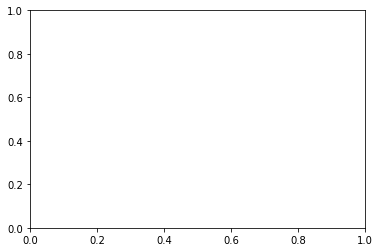

In [3]:
fig, axes = plt.subplots(1, 1)
type(plt.gca()) ## gca --> get current axes

### Axis

`Axis` is the object which refers to the one of the 2 or 3 axes in our chart.

In [4]:
axes.get_xaxis()

## PyPlot

Pyplot is a module in the `matplotlib` which essentially provides us a quick way to create charts.

- When you start working on a figure, it remembers which figure and axes that you would be referring to.
- All interaction is done by calling functions on the `pyplot` module.

Let's see it in action.

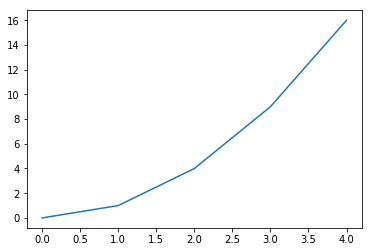

In [5]:
x = pd.Series(range(5))
y = x**2

plt.plot(x, y)
plt.show()

As you can see, we just called the `plot()` function with our **x** and **y** ranges, and it created a line plot using that.

- The `plot()` function is used to create lines or markers in our chart. We will see more details about it very soon.
- There are other functions like `bar()` or `scatter()` for other kinds of chart.
- When we call one of these functions, the `Figure` and the `Axes` objects are created automatically. This is useful when we have to create one or two simple charts. In other cases, it's recommended to create these two objects manually.

Before we dive deeper into the functions in `pyplot`, let's see another example.

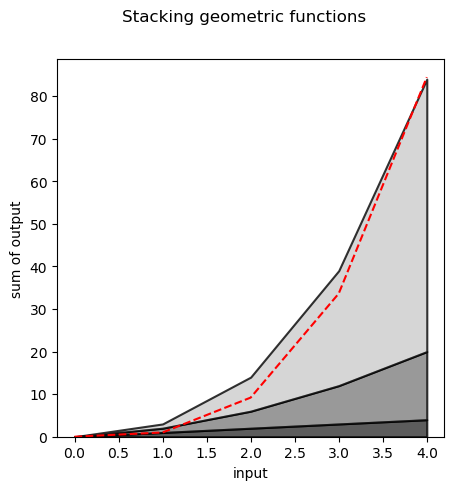

In [6]:
y1 = x
y2 = x**2
y3 = x**3
y4 = x**3.2

plt.figure(figsize=(5,5), dpi=100)
plt.stackplot(x, y1, y2, y3, colors=[(0.2,0.2,0.2), (0.5,0.5,0.5), (0.8,0.8,0.8)], edgecolor='k', linewidth=1.5, alpha=0.8)
plt.plot(x, y4, 'r--')
plt.suptitle('Stacking geometric functions')
plt.xlabel('input')
plt.ylabel('sum of output')
plt.show()

This example more clearly illustrates how `pyplot` is used - we can just keep adding or refining elements of our chart by calling functions in the `pyplot` module.

### PyPlot functions



#### plt.figure()

Allows us to define the properties of the figure. The arguments which are most useful:
- `figsize = (width, height)`  - in inches
- `dpi = dpi_value` - dpi stands for dots per inch. Using figsize and dpi, the final size of the image is defined.

We have already seen this in action in our last example.

#### plt.plot()

This function is used to create line and marker plots. We have already seen a couple of examples of this.

The call to this function looks like this:

```python
plt.plot(X1, Y1, format1, X2, Y2, format2, ...)
```

- X1 and Y1 are the X and Y values for a given series.
- format is definition of line or marker. The format argument takes a string which defines the color and the line or marker type.

For example:
- `b-` means blue line
- `b--` means blue dashed line
- `rs` means red squares, 's' denoting a square
- `ko` means black circles, 'k' denoting the black color, and 'o' denoting circles.

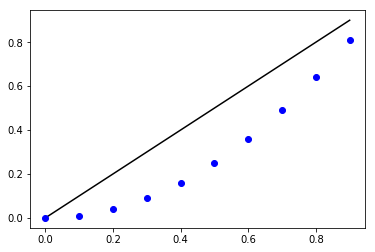

In [7]:
X = pd.Series(range(10)) / 10.0

plt.plot(X, X, 'k-', X, X**2, 'bo')
plt.show()

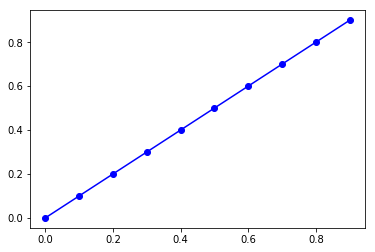

In [8]:
plt.plot(X, X, 'b-', X, X, 'bo')
plt.show()

The last example shows how you can create a line with markers at data points.

#### plt.bar()

The `bar()` function is used for column charts.

- `width` defines the width of the bar
- `color` defines the color of the bar

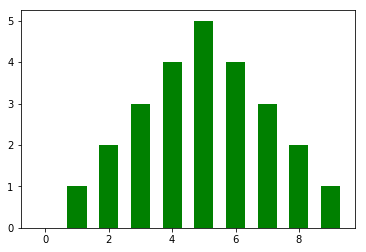

In [9]:
X = pd.Series(range(10))
Y = pd.concat([X[:5], 10 - X[5:]])

plt.bar(X, Y, width=0.6, color='g')
plt.show()

There is another argument that is very useful - called `bottom`. It's a series of values which defines the base of each bar in the bar chart. Let's see below how this can be used to create a stacked bar chart.

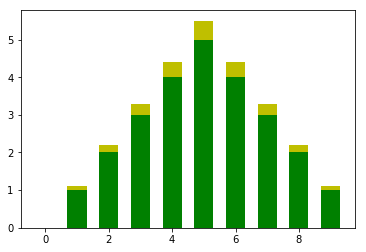

In [10]:
Y2 = Y * 0.1

plt.bar(X, Y, width=0.6, color='g')
plt.bar(X, Y2, bottom=Y, width=0.6, color='y')
plt.show()

The values in `Y2` are added to the values in `Y`.

#### plt.barh()

This is analogous to the `bar()` function, but this creates a horizontal bar chart. The `height` argument defines the "width" of the bar instead.

Note that the first argument defines the vertical axes, and that it's drawn "bottom up"

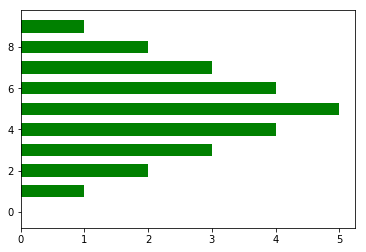

In [11]:
plt.barh(X, Y, height=0.6, color='g')
plt.show()

#### plt.hist()

The `hist()` function is used to create a _histogram_. Given a list of values, histogram is essentially a count of values which lie within each bucket. For example, if we have ages of 100 people, and we create age buckets of the type 0-10, 10-20, and so on, we will see how many people belong to each age group.

It's most important arguments are:
- `x` - The list of values.
- `bins` - The function will automatically create these many bins
- `normed` - The sum of all values is normalized to this number
- `facecolor` - the color of the bars in histogram

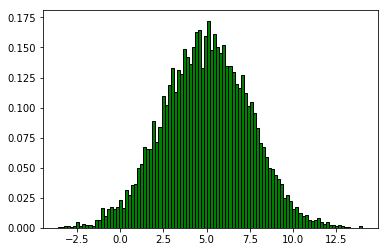

In [12]:
import numpy as np

mu, sigma = 5, 2.5
x = mu + sigma * np.random.randn(10000)  ## randn uses (0,1) normal distribution

plt.hist(x, bins=100, density=1, facecolor='g', edgecolor='k')
plt.show()

#### plt.stackplot()

This creates a continuous stacked area plot, as the one we made in the example before. 
- The format of the call is `plt.stackplot(X, Y1, Y2, Y3, ...)
- `colors` arguments takes an array of colors, which are applied to each area going bottoms up

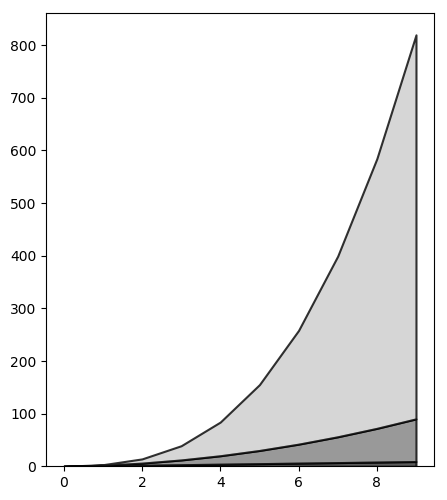

In [103]:
x = pd.Series(range(10))
y1 = x
y2 = x**2
y3 = x**3

plt.figure(figsize=(5,6), dpi=100)
plt.stackplot(x, y1, y2, y3, colors=[(0.2,0.2,0.2), (0.5,0.5,0.5), (0.8,0.8,0.8)], edgecolor='k', linewidth=1.5, alpha=0.8)
plt.show()

#### plt.scatter()

This creates a scatter plot, as one would expect. Before I illustrate the function, let's look at the data below.

In [14]:
wine_data = pd.read_csv('wine_scatter.csv')
wine_data.fillna(0, inplace=True)
wine_data.head(20)

,country,price,points,count
0,Argentina,24.510117,86.710263,3543
1,Armenia,14.500000,87.500000,2
2,Australia,35.437663,88.580507,2183
3,Austria,30.762772,90.101345,3022
4,Bosnia and Herzegovina,12.500000,86.500000,2
5,Brazil,23.765957,84.673077,49
6,Bulgaria,14.645390,87.936170,132
7,Canada,35.712598,89.369650,226
8,Chile,20.786458,86.493515,4178
9,China,18.000000,89.000000,1


The arguments used in the scatter plot are as follows:

- the first two arguments represent the X axis values and the Y axis values, respectively
  - Note that we can use the argument `data` to refer to our DataFrame, and then use just the column name strings to provide X and Y series for plotting.
- `s` represents the size of the dot created. If you double the value of s, the _area_ of the dot doubles. In our graph, we are using the count for dot size.
- `alpha` represents the transparency of the dot. 0 means fully transparent, 1 means opaque.
- `color` represents the color of the dot. It's given in `(R, G, B)` format, where each of `R`, `G`, `B` values are between 0 and 1.

Lastly, I'm using a package called `adjustText` to make the labels appear non-overlapping.

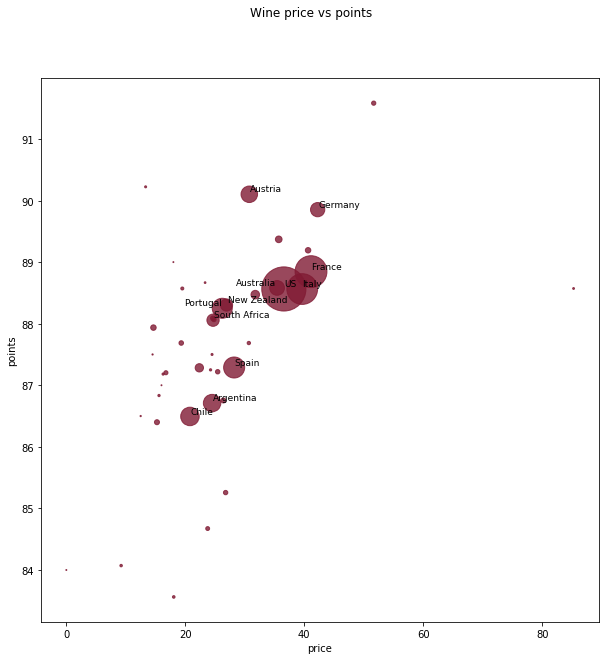

In [97]:
import math
from adjustText import adjust_text

plt.figure(figsize=(10,10))
plt.scatter('price', 'points', s=wine_data['count']**0.7, data=wine_data, alpha=0.8, color=(0.5, 0.1, 0.2))

# To label x, y axes and the title.
plt.xlabel('price')
plt.ylabel('points')
plt.suptitle('Wine price vs points')

# to set text labels against some of the dots.
texts = []
for i in range(len(wine_data)):
    row = wine_data.iloc[i]
    if row['count'] > 1000:
        x = float(row['price'])
        y = float(row['points'])
        texts.append(plt.text(x, y, row['country'], fontsize=9))

# adjust_text function automatically rearranges labels for them to
# be non-overlapping
adjust_text(texts)

plt.show()

#### plt.pie()

Finally, we come to the loved and hated Pie Chart.

Let's use the wine_scatter dataframe to create a pie chart. Let's see what's the biggest wine producing region by the different wines produced. In the following code snippet, we are creating a dataframe that includes the larger regions and bunches the rest of them under the `Others` category.

In [68]:
wine_count_sorted = wine_data.sort_values(by='count', ascending=False)[['country', 'count']]
wine_small = wine_count_sorted[wine_count_sorted['count'] < 2000]
wine_count_large = wine_count_sorted[wine_count_sorted['count'] >= 2000]
wine_count_large = wine_count_large.append({'country':'Others', 'count':wine_small['count'].sum()}, ignore_index=True)

The following arguments are used in the following snippet
- The first argument (`X`) contains the values that we want to plot. These values don't have to sum to 100 - `pie()` function automatically calculates the percentage values.
- `startangle` tells `pyplot` where to start the first pie from. By default, it starts from the horizontal line (at 90 degree clockwise), which I find not to be very intuitive.
- `counterclock` tells the function whether to go clockwise or counterclockwise order for the pies in the data.
- `labels` argument is used to assign label to each pie.
- `rotatelabels` makes the labels have the same angle as the center-line of each pie. I find this as more readable.
- `autopct` takes a format string to print the percent contribution of each pie.

You can also assign custom colors for each pie, by providing the `colors` argument with a list of colors corresponding to the `X` values.

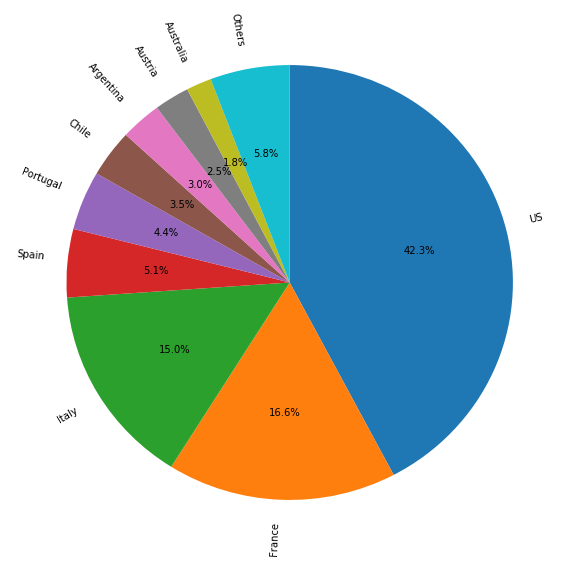

In [102]:
plt.figure(figsize=(10,10))
plt.pie('count', startangle=90, counterclock=False, labels='country', rotatelabels=True, autopct="%.1f%%", data=wine_count_large)
plt.show()

### Creating many sub plots

One common requirement seems to be able to create multiple charts in the same figure. We can achieve that with the `subplot()` function. 

This takes 3 arguments - `(rows, columns, index)`. As an example, if we were creating a 2 x 2 grid of charts, `rows` and `columns` would each equal 2, and `index` represents the plot that you want to work on at the moment.

Let's see an example.

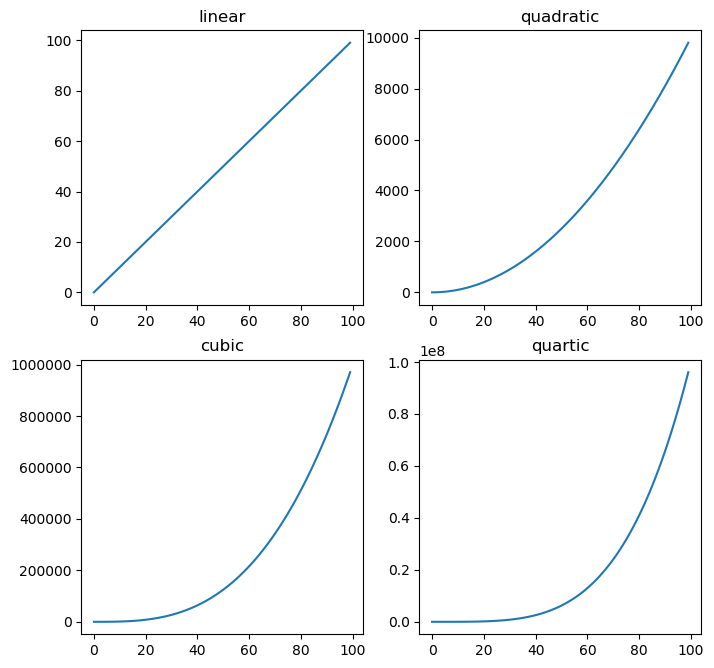

In [17]:
x = pd.Series(range(100))
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

plt.figure(figsize=(8,8), dpi=100)
plt.subplot(2,2,1)
plt.plot(x, y1)
plt.title('linear')

plt.subplot(2,2,2)
plt.plot(x, y2)
plt.title('quadratic')

plt.subplot(2,2,3)
plt.plot(x, y3)
plt.title('cubic')

plt.subplot(2,2,4)
plt.plot(x, y4)
plt.title('quartic')

plt.show()